In [2]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 4: Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization
## Due Date: Monday 10/28 by 11:59 PM PST

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

## Introduction

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

In this assignment, you will perform tasks to clean, visualize, and explore the bike sharing data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For plots, your plots should be *similar* to the given examples. They don't need to be identical (*e.g.* same colors).

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

In [6]:
# Run this cell to set up your notebook.  Make sure ds100_utils.py is in this assignment's folder
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Download the Data

In [9]:
# Run this cell to download the data.  No further action is needed

data_url = 'https://github.com/DS-100/fa20/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = '.'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Wed Oct 23 15:41:04 2024
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data.zip
Extracted Files:
	 data\.ipynb_checkpoints
	 data\bikeshare.txt


### Examining the file contents

Can you identify the file format? (No answer required.)

In [11]:
# Run this cell to look at the top of the file.  No further action is needed
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### Size
Is the file big?  How many records do we expect to find? (No answers required.)

In [13]:
# Run this cell to view some metadata.  No further action is needed
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### Loading the data

The following code loads the data into a Pandas DataFrame.

In [15]:
# Run this cell to load the data.  No further action is needed
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## 0: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

### Question 0
#### Question 0A
What is the granularity of the data (i.e. what does each row represent)?

<!--
BEGIN QUESTION
name: q0a
points: 1
manual: true
-->

**Your response:** Each row represents an hour of a day for the date that it represents. With that hour we get some values based on whatever this bike sharing company collected for that hour. 

In [19]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

#### Question 0B
For this assignment, we'll be using this data to study bike usage in Washington D.C. Based on the granularity and the variables present in the data, what might some limitations of using this data be? What are two additional data categories/variables that you can collect to address some of these limitations?

<!--
BEGIN QUESTION
name: q0b
points: 1
manual: true
-->

**Your response:** After quickly examining the data (and completing the homework), I've come back to this question to answer that we don't have the data to truly address social-based questions. One of the first additional data categories I'd want to add would be location counts of where a bike was activated. We wanted to address equitability, and with location counts we could investigate if our bike sharing system was able to meet the needs of the city by providing equal access across different neighborhoods. One other variable that could be collected to see how effective our bike system is would be traffic data around the city. One of our goals with this system is to reduce traffic, but how can we do that if we don't have any information that tells us how effective we are? By collecting data related to tradtional car congestion around the city, we could investigate the effects of our bike program on traffic in the city.

In [22]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on.

**Note:** If you want to revert changes, run the cell that reloads the csv.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The nested dictionary method mentioned in the documentation would be an efficient option, but there are other ways as well!
<!--
BEGIN QUESTION
name: q1a
points: 2
-->

In [25]:
#help(pd.DataFrame.replace)

In [26]:
# Modify holiday weekday, workingday, and weathersit here
bike_staging = bike #this lets me mutate things without worrying about touching the original data
days = "Sun Mon Tue Wed Thu Fri Sat".split()
days_num = np.arange(0,7)

weather = "Clear, Mist, Light, Heavy".split()
weather_num = np.arange(1,5)

bike_staging["weekday"] = bike_staging["weekday"].replace(to_replace = days_num, value = days)
bike_staging["holiday"] = bike_staging["holiday"].replace(to_replace = [0,1], value = ["no", "yes"])
bike_staging["workingday"] = bike_staging["workingday"].replace(to_replace = [0,1], value = ["no", "yes"])
bike_staging["weathersit"] = bike_staging["weathersit"].replace(to_replace = weather_num, value = weather)

In [27]:
bike = bike_staging

In [28]:
grader.check("q1a")

q1a results: All test cases passed!

#### 
















Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.
<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [30]:
num_holidays = len(bike[bike["holiday"] == "yes"])
#there are 24 entries for each day
num_holidays

500

In [31]:
grader.check("q1b")

q1b results: All test cases passed!

#### Question 1c (Computing Daily Total Counts)
In the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

<!--
BEGIN QUESTION
name: q1c
points: 2
-->

In [33]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,"Clear,",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,"Clear,",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,"Clear,",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,"Clear,",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,"Clear,",0.24,0.2879,0.75,0.0,0,1,1


In [34]:
daily_counts = bike[["dteday","casual","registered","workingday"]]
daily_counts = daily_counts.groupby(by = ["dteday", "workingday"]).sum(["casual","registered"]).reset_index()
daily_counts.set_index(daily_counts["dteday"])
daily_counts

,dteday,workingday,casual,registered
0,2011-01-01,no,331,654
1,2011-01-02,no,131,670
2,2011-01-03,yes,120,1229
3,2011-01-04,yes,108,1454
4,2011-01-05,yes,82,1518
...,...,...,...,...
726,2012-12-27,yes,247,1867
727,2012-12-28,yes,644,2451
728,2012-12-29,no,159,1182
729,2012-12-30,no,364,1432


In [35]:
grader.check("q1c")

q1c results: All test cases passed!

---
## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

<!-- BEGIN QUESTION -->

### Question 2
#### Question 2a

Use [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c. 

Include a legend, xlabel, ylabel, and title. Note that the `alpha` argument determines the opacity of plotted elements. 

After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="600px" />

<!--
BEGIN QUESTION
name: q2a
points: 2
manual: true
-->

In [38]:
daily_counts.sort_values("registered", ascending = False).head()

,dteday,workingday,casual,registered
634,2012-09-26,yes,787,6946
629,2012-09-21,yes,1250,6917
648,2012-10-10,yes,780,6911
662,2012-10-24,yes,795,6898
641,2012-10-03,yes,728,6844


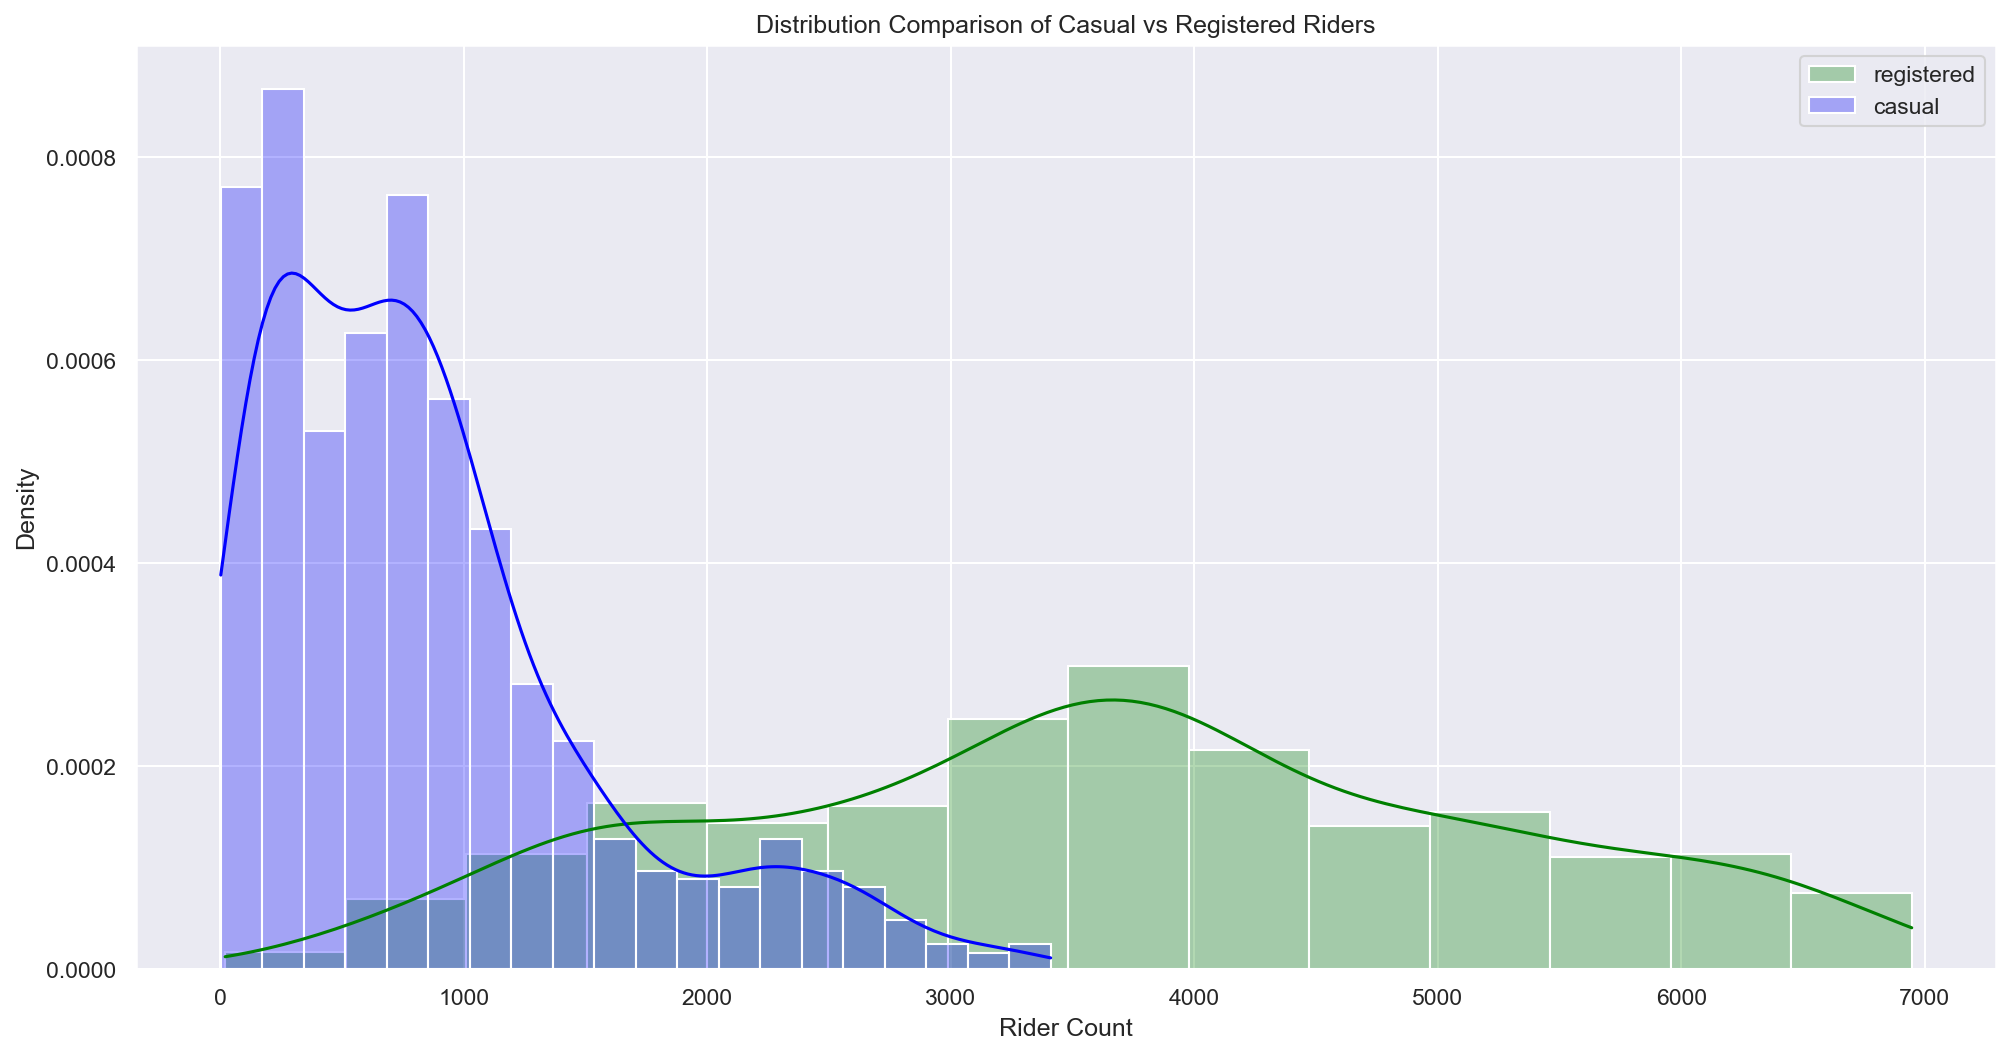

In [39]:
#Your plot
sns.histplot(data= daily_counts, x = "registered", kde = True,alpha = .3, stat="density", label = "registered", color = "green")
sns.histplot(data = daily_counts, x = "casual", kde = True, alpha = .3,stat="density", label = "casual", color = "blue")
plt.xlabel("Rider Count")
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.legend()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered riders.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 
<!--
BEGIN QUESTION
name: q2b
points: 2
manual: true
-->

**Your response:** As far as this goes this orange graph representing being a casual rider is skewed to the right, while the blue graph representing the registered rider's is unimodal and symmetric. I wouldn't say that there are any clear outliers between either of these two graphs. While there are no gaps in the histogram that represents registered, there is a small gapp in the casual rider histogram in the 400-600 bin. It seems like the mode for the casual riders is in the 200-400 range, whole the mode for the registered riders is around 3500-4000.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2c

The density plots do not show us how the counts for registered and casual riders vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let's use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is a working day (your colors do not have to match ours exactly, but they should be different based on whether the day is a working day). 

There are many points in the scatter plot, so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. 

<img src='images/casual_registered_working_nonworking.png' width="600px" />

**Hints:** 
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws`.

<!--
BEGIN QUESTION
name: q2c
points: 2
manual: true
-->

Text(0.5, 1.0, 'Comparison of Casual vs Registered Riders on Working and Non-Working Days')

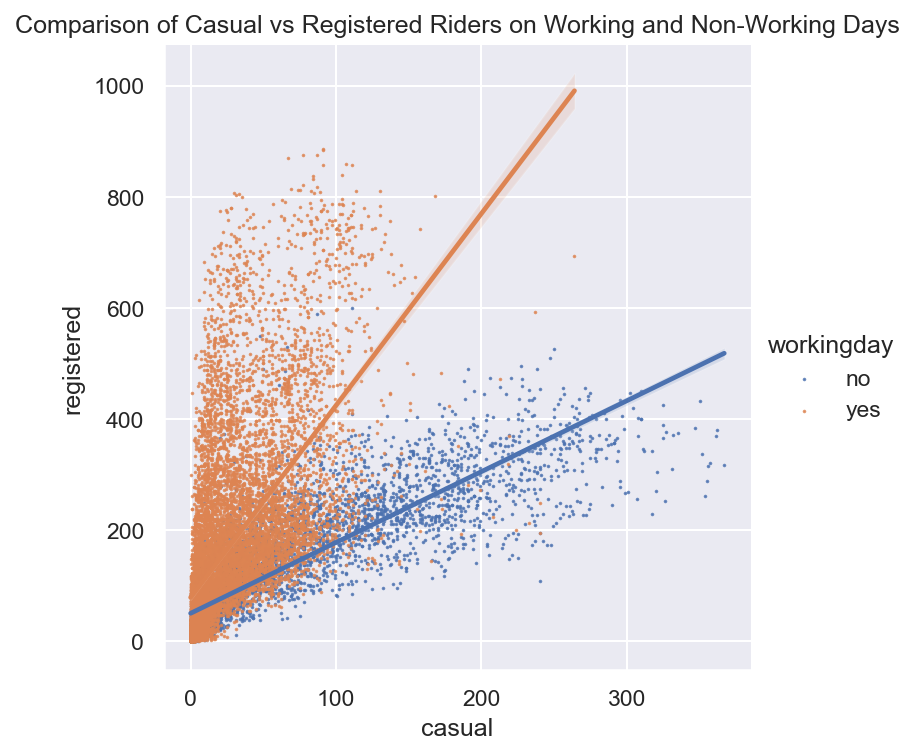

In [43]:
# Make the font size a bit bigger
sns.set(font_scale=1)
sns.lmplot(data = bike, x = "casual", y = "registered", fit_reg = True, hue = "workingday", height = 5, scatter_kws = {"s": .5})
plt.title("Comparison of Casual vs Registered Riders on Working and Non-Working Days")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? What effect does [overplotting](http://www.textbook.ds100.org/ch/06/viz_principles_2.html) have on your ability to describe this relationship?

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: true
-->

**Your response:** This scatterplot reveals that registered riders tend to ride much more frequently through the typical work week. On the other hand, it seems that if there are many casual riders in a day, it is probably a weekend. Overplotting makes analyzing the relationship a little challenging because there are just so many points close to the origin such that you cannot really tell/see the relationship at smaller values of casual riders. 

---
## 3: Understanding Daily Patterns

### Question 3

#### Question 3a
Let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Your plot should look like the plot below. While we don't expect your plot's colors to match ours exactly, your plot should have different colored lines for different kinds of riders.

<img src="images/diurnal_bikes.png" width="600px"/>

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->

<Axes: xlabel='hr', ylabel='casual'>

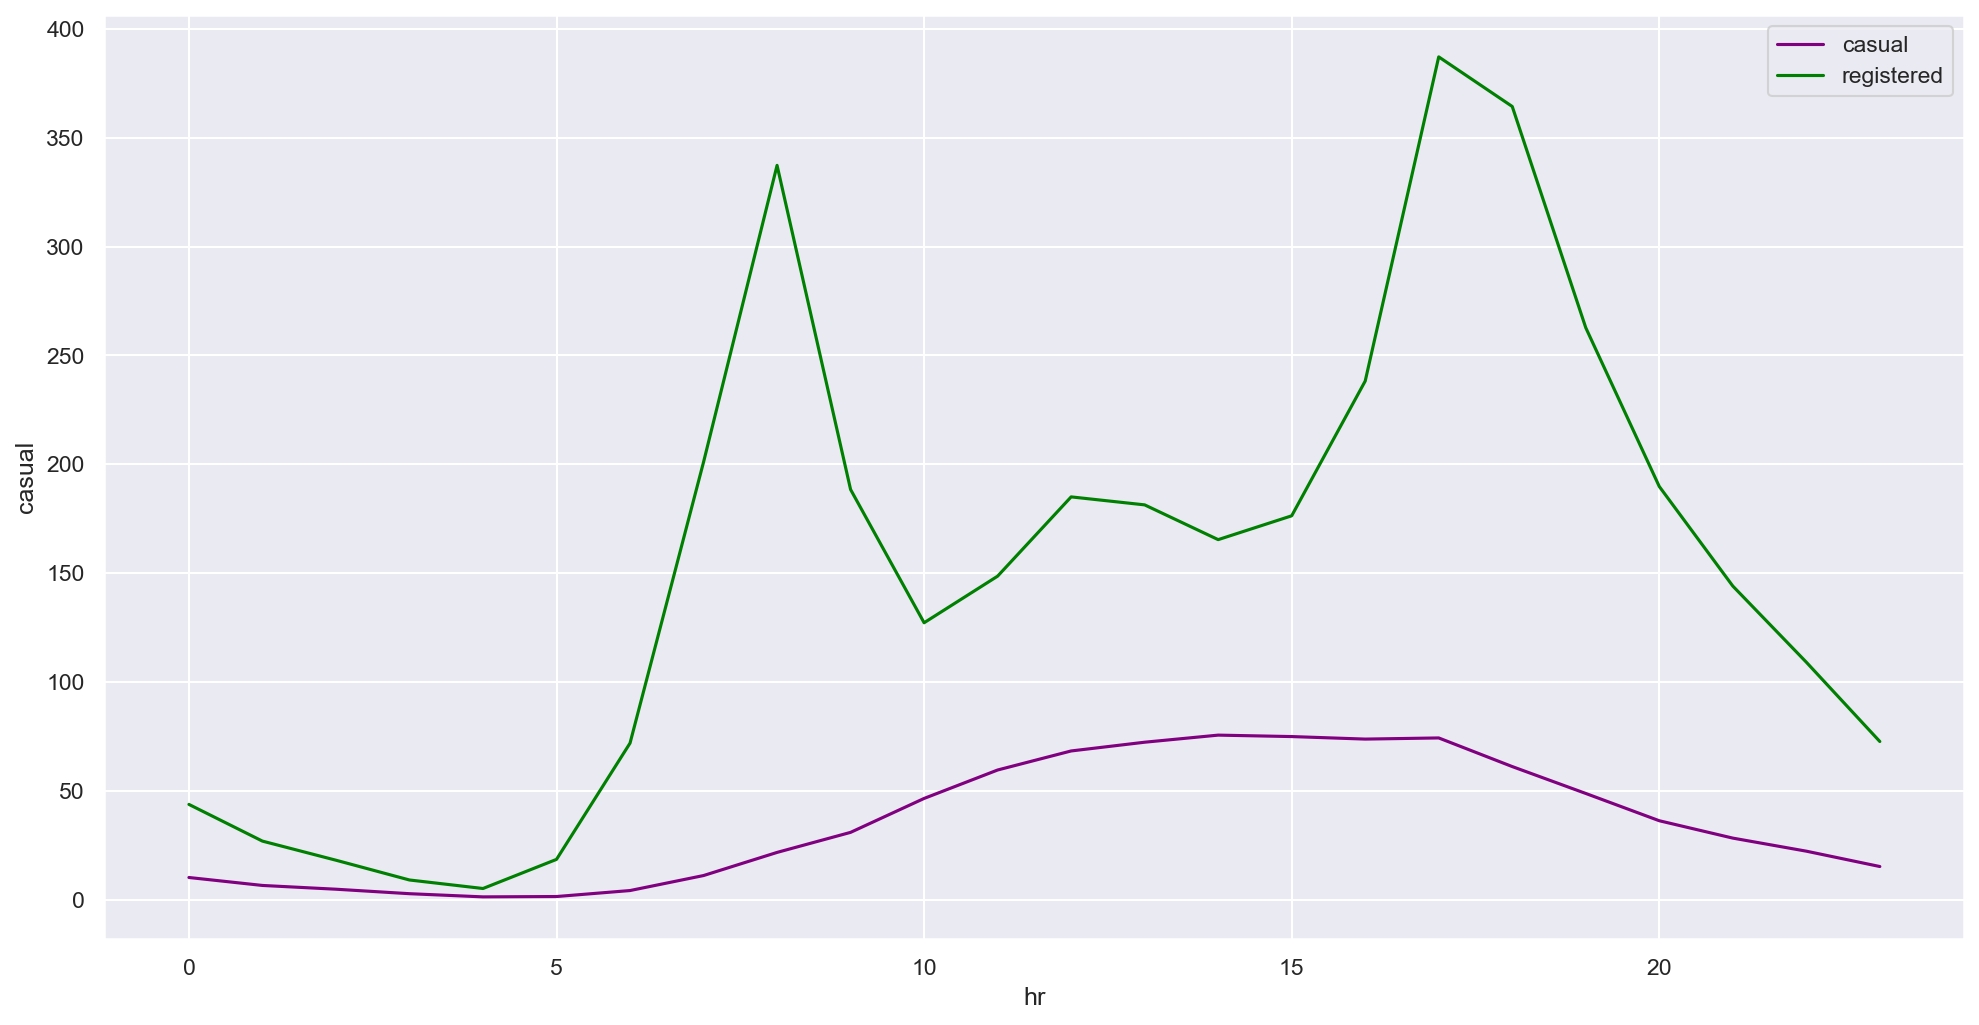

In [47]:
hour_avg = bike.groupby(by = "hr").mean(["casual","registered"]).reset_index()
sns.lineplot(data = hour_avg, x = "hr", y = "casual", label = "casual", color = "purple")
sns.lineplot(data = hour_avg, x = "hr", y = "registered", label = "registered", color = "green")
#hour_avg.head()

In [48]:
sns.lineplot

<function seaborn.relational.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, weights=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)>

#### Question 3b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered riders' distribution.
<!--
BEGIN QUESTION
name: q5b
points: 2
manual: true
-->

It looks quite clear that in there are two main spikes in the registered rider distribution -particuarly around 8 am and 5pm (17 hours). To me I this implies that registered riders use the bike sharin 

## 4: Exploring Ride Sharing and Weather
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

### Question 4

#### Question 4a
Create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.
<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [52]:
bike["prop_casual"] = bike["casual"] / bike["cnt"]
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,"Clear,",0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,"Clear,",0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,"Clear,",0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,"Clear,",0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,"Clear,",0.24,0.2879,0.75,0.0,0,1,1,0.000000


In [53]:
grader.check("q4a")

q6a results: All test cases passed!

#### Question 4b
In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

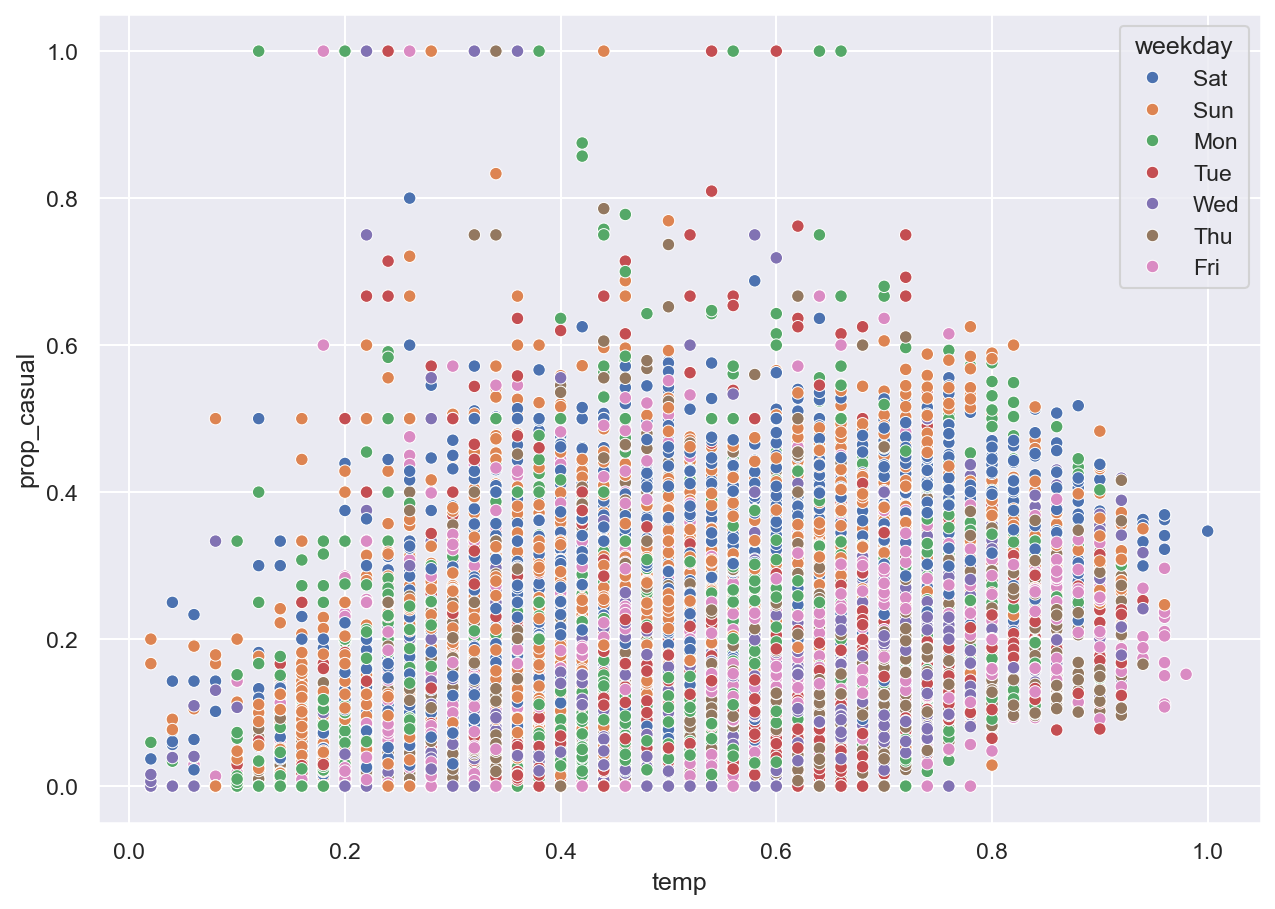

In [55]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x="temp", y="prop_casual", hue="weekday");

We could attempt linear regression using `sns.lmplot` as shown below, which hint at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

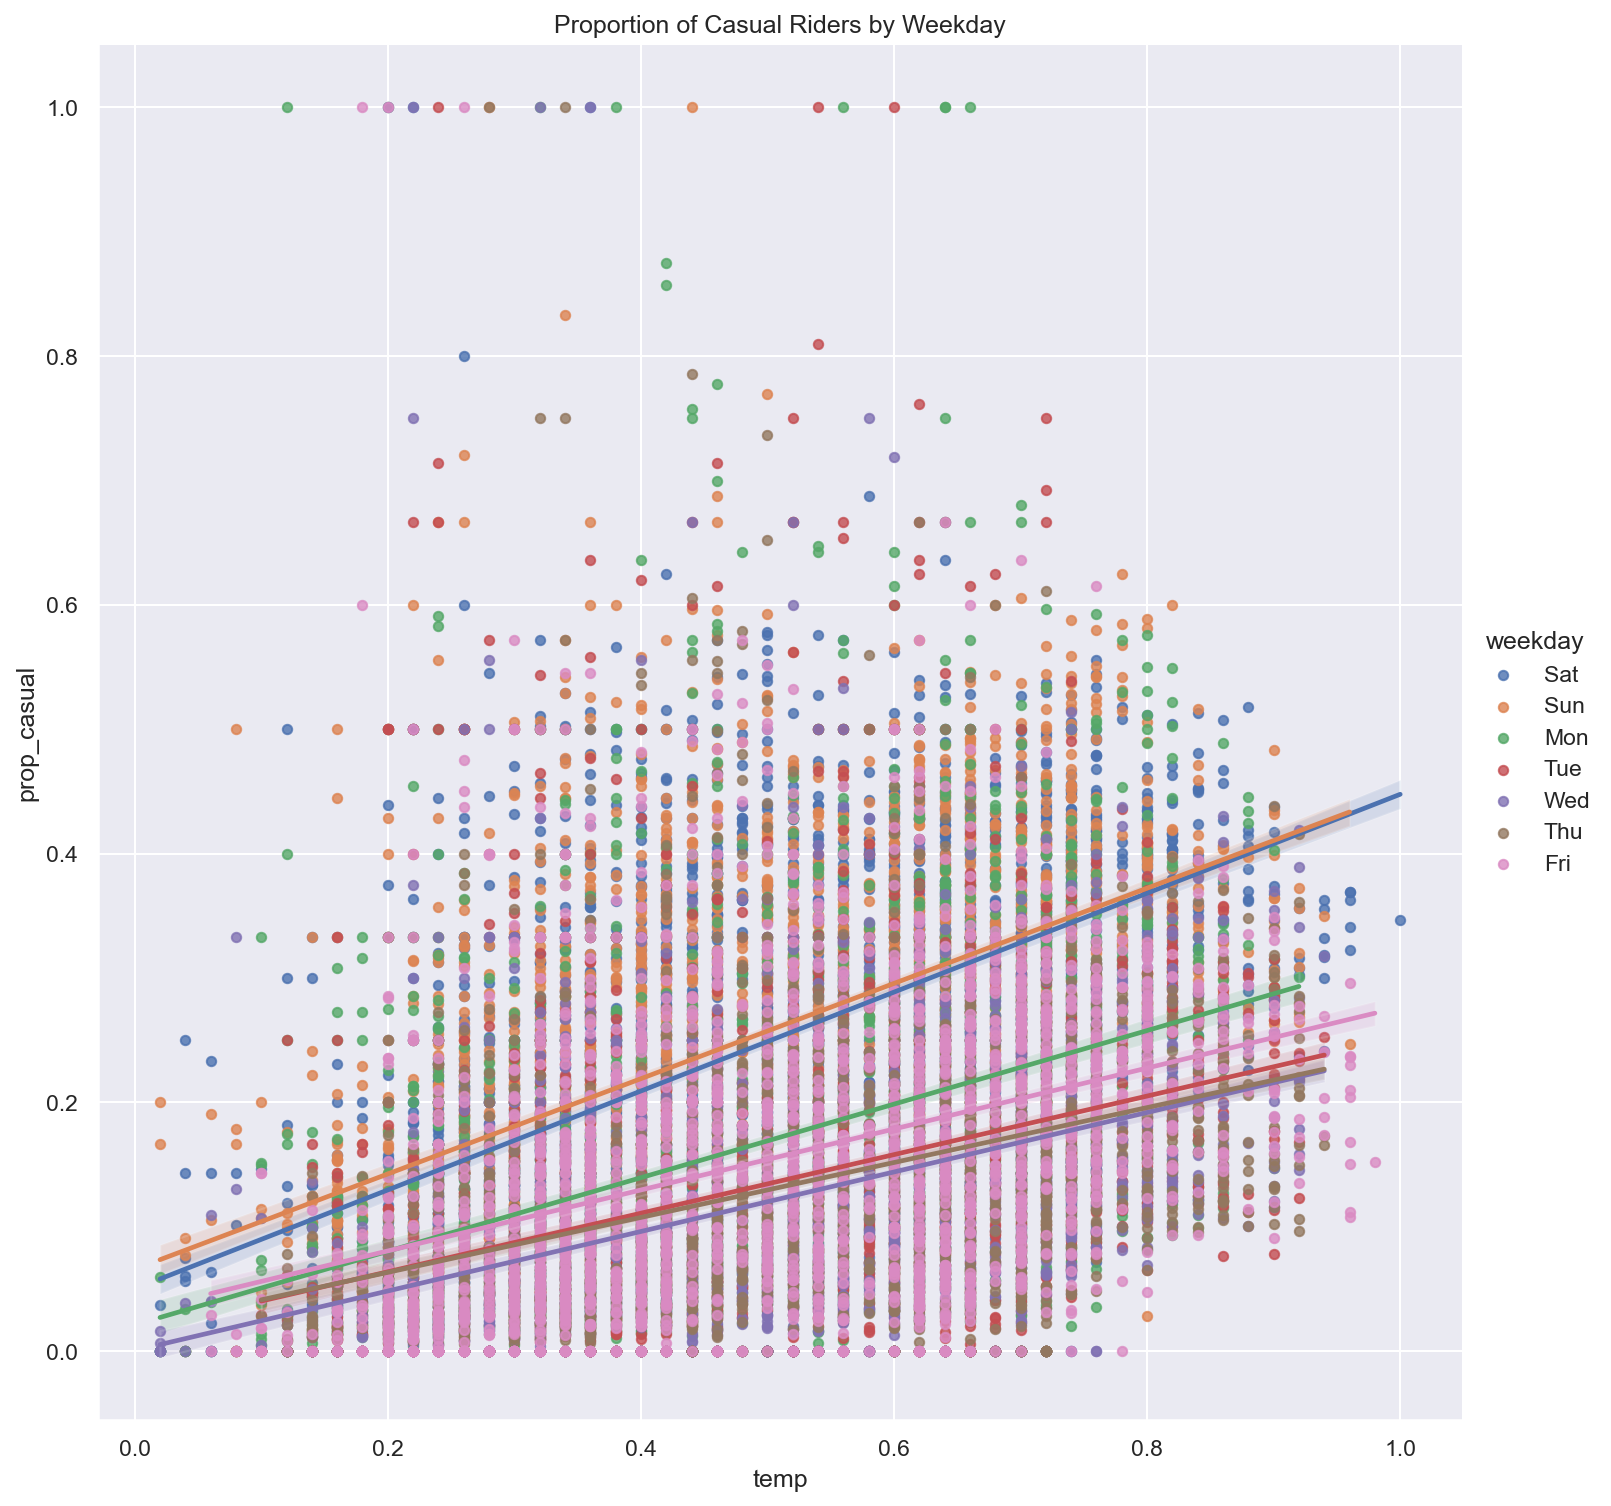

In [57]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The red curve shown is a smoothed version of the scatterplot.

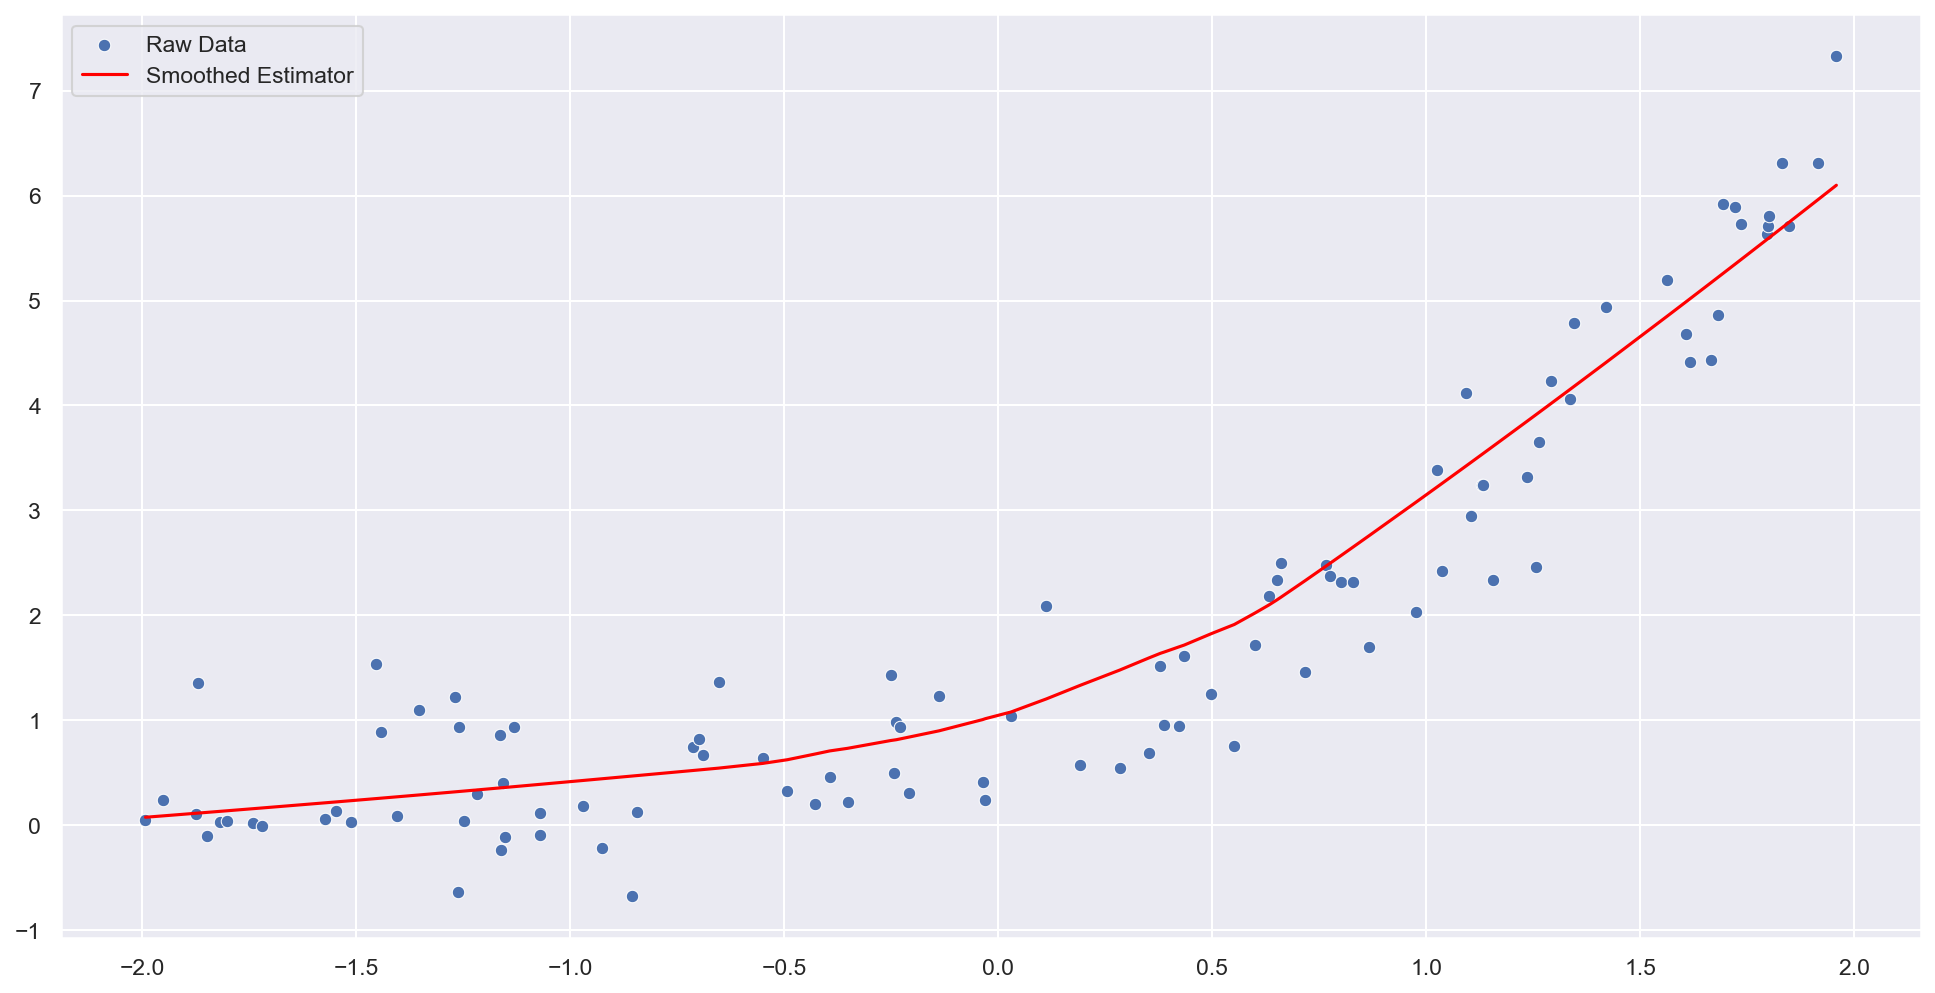

In [59]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(x = xobs, y = yobs, label="Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(x = xobs, y = ysmooth, label="Smoothed Estimator", color='red')
plt.legend();

<!-- BEGIN QUESTION -->

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting.

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate.

* Look at the top of this homework notebook for a description of the temperature field to know how to convert to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} * \frac{9}{5} + 32$.

Note: If you prefer plotting temperatures in Celsius, that's fine as well!
<!--
BEGIN QUESTION
name: q6b
points: 4
manual: true
-->

In [62]:
'''
#testing cell for just sat, now I just do this where i loop through values that change the day
bike["temp_f"] = ((bike["temp"] * 41)*(9/5)) + 32
bike.sort_values("temp_f", ascending = False).head()
x_test = bike[bike["weekday"] == "Sat"]["temp_f"]
y_test = bike[bike["weekday"] == "Sat"]["prop_casual"]
ysmooth_testing = lowess(y_test,x_test, return_sorted = False)
sns.lineplot(x = x_test, y = ysmooth_testing, label = "Smoothest Estimator Sat", color = "red")
plt.legend()
'''

'\n#testing cell for just sat, now I just do this where i loop through values that change the day\nbike["temp_f"] = ((bike["temp"] * 41)*(9/5)) + 32\nbike.sort_values("temp_f", ascending = False).head()\nx_test = bike[bike["weekday"] == "Sat"]["temp_f"]\ny_test = bike[bike["weekday"] == "Sat"]["prop_casual"]\nysmooth_testing = lowess(y_test,x_test, return_sorted = False)\nsns.lineplot(x = x_test, y = ysmooth_testing, label = "Smoothest Estimator Sat", color = "red")\nplt.legend()\n'

In [112]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual,temp_f
0,1,2011-01-01,1,0,1,0,no,Sat,no,"Clear,",0.24,0.2879,0.81,0.0,3,13,16,0.187500,49.712
1,2,2011-01-01,1,0,1,1,no,Sat,no,"Clear,",0.22,0.2727,0.80,0.0,8,32,40,0.200000,48.236
2,3,2011-01-01,1,0,1,2,no,Sat,no,"Clear,",0.22,0.2727,0.80,0.0,5,27,32,0.156250,48.236
3,4,2011-01-01,1,0,1,3,no,Sat,no,"Clear,",0.24,0.2879,0.75,0.0,3,10,13,0.230769,49.712
4,5,2011-01-01,1,0,1,4,no,Sat,no,"Clear,",0.24,0.2879,0.75,0.0,0,1,1,0.000000,49.712


Text(0.5, 1.0, 'Temperature (F) vs Casual Rider Proportion by Weekday')

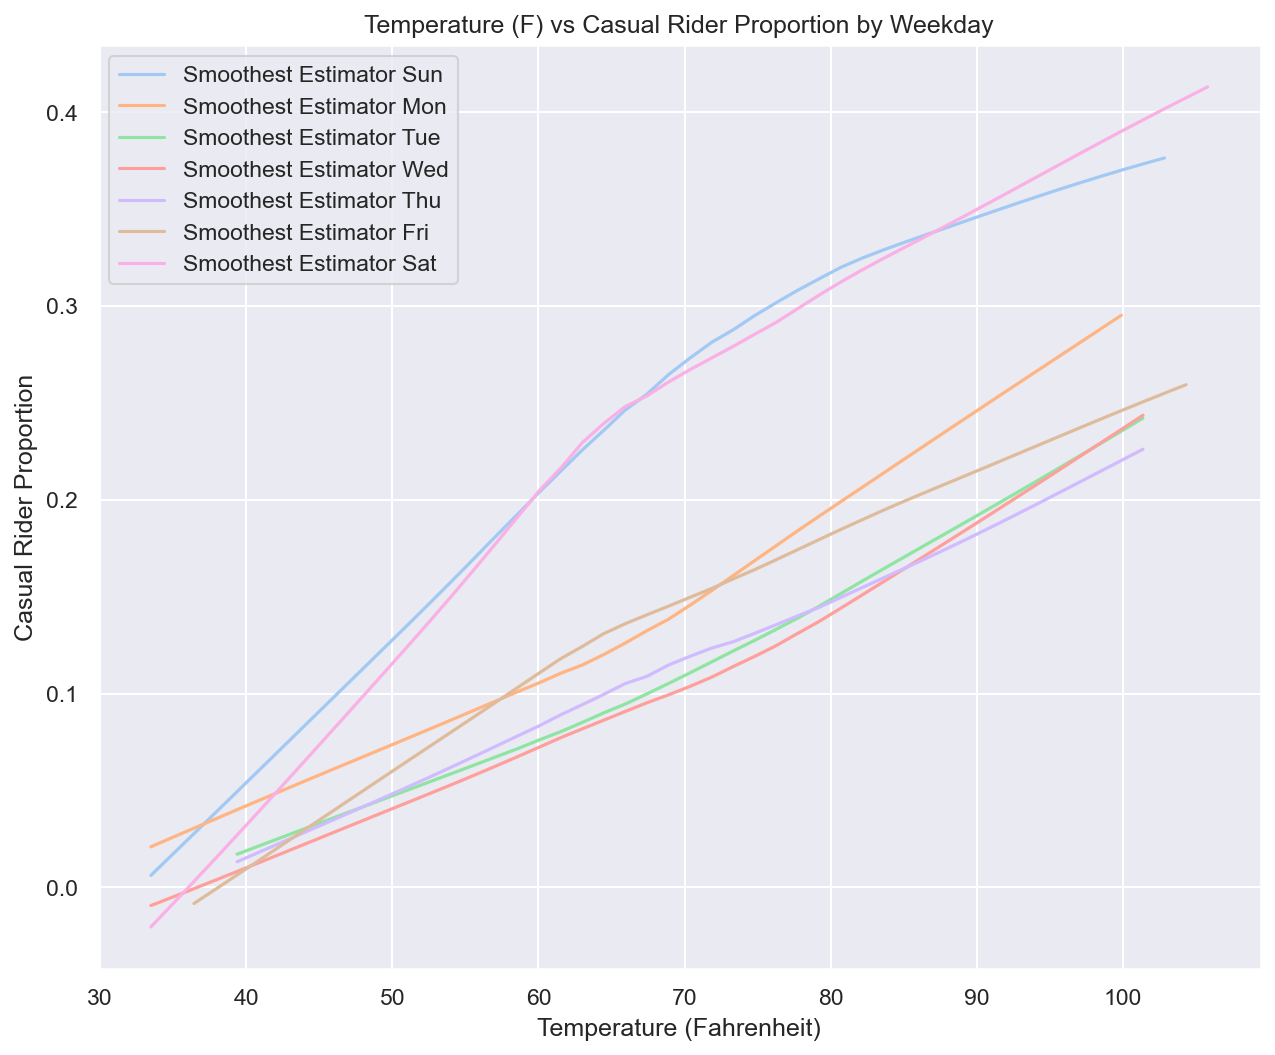

In [64]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(10,8))
color_pal = sns.color_palette("pastel")
bike["temp_f"] = ((bike["temp"] * 41)*(9/5)) + 32
for i in range(len(days)):
    day = days[i] #this is a list containing the days: ["Sun,"Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
    x_test = bike[bike["weekday"] == day]["temp_f"]
    y_test = bike[bike["weekday"] == day]["prop_casual"]
    ysmooth_testing = lowess(y_test,x_test, return_sorted = False)
    sns.lineplot(x = x_test, y = ysmooth_testing, label = f"Smoothest Estimator {day}", color = color_pal[i])
    
plt.legend()
plt.xlabel("Temperature (Fahrenheit)"); plt.ylabel("Casual Rider Proportion"); plt.title("Temperature (F) vs Casual Rider Proportion by Weekday")

#### Question 4c
What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?
<!--
BEGIN QUESTION
name: q4c
points: 2
manual: true
-->

**Your response**: This plot shows that there is a direct postivie relationship between temperature and casual rider proportion. As the temperature increases, so does the proportion of casual riders. There is a large distinction between the Sat and Sun curves, which further shows our earlier claim that casual riders ride much more frequently on the weekends. Another interesting observation is that there are more casual riders on mondays and fridays, while fridays may be expected because friday is often considered as part of a weekend, mondays is kind of unexpected. 

## Question 5: Expanding our Analysis

### Question 5
#### Question 5a

Imagine you are working for a Bike Sharing Company that collaborates with city planners, transportation agencies, and policy makers in order to implement bike sharing in a city. These stakeholders would like to 1) reduce congestion and lower transportation costs, and 2) ensure the bike sharing program is implemented equitably, such that bike shares are readily available to all members of the city across different socio-economic classes, races, and neighborhoods.  

Take a high-level perspective on your dataset. In what ways are our data already suited for informing these two objectives? What kind of data might we want to collect to redress deficiencies in our dataset's ability to address these objectives?

<!--
BEGIN QUESTION
name: q5a
points: 2
manual: true
-->

**Your response**: So our data really only creates a distinction between casual riders and riders that are registered so we cannot make any incredible inferences revolving around equitability or different socio-economic classes. Another thing is that we really don't have any direct data on traffic congestion. Two things that seem important to collect to address these deficiencies would be traffic data and locations where the bike was turned on/used. By collecting these, it would make it possible to make judgements about our first goal of reducing congestion while, also addressing our second goal of trying to make access to the bike service equitable. However, we do have a good baseline for addressing these goals as our data provides a general baseline for who (casual/registered) uses our service at a given time and how various factors (temperature, holidays, time of day, etc) play into our services use. By collecting location and traffic data we would be able to combine these two points to adress the stakeholders goals.    

#### Question 5b
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us) and new cities and regions are making efforts to implement bike sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities of the U.S. 

Based on your plots in this assignment as well as any additional plots you might want to make, what factors would you encourage your company to consider when evaluating potential cities for expansion and why? Consider at least two factors.

**Note**: There isn't a set right or wrong answer for this question, feel free to come up with your own conclusions based on evidence from your plots! 

<!--
BEGIN QUESTION
name: q7b
points: 2
manual: true
-->

**Your response**: Well there are a couple of questions that are important to consider, I think one of the most important questions is asking "does this potential town already have the infrastructure for bikes?". While having a bike sharing system in cities is important, no one will want to bike if it's inconvenient, nor while people want to bike if it feels unsafe. Some factors that we could consider as proxy for infrastructure could be "percentage of roads with a bike lane" or maybe "number of bikable trails per capita". Another thing to consider (using a plot we made) is the climate of the city. One of the plots we made shows that there is a direct positive correlation between temperature and a casual proportion of bike riders. We can make an additional plot below using the same method where instead of measuring proportion we can measure a count. Looking at this plot it is clear that as temperature increases, the number of riders also increases. This points us to look for a city that has a warmer climate, considering we want our bike system to actually be used once implemented. 

Text(0.5, 1.0, 'Temperature (F) vs Number of Bike Riders')

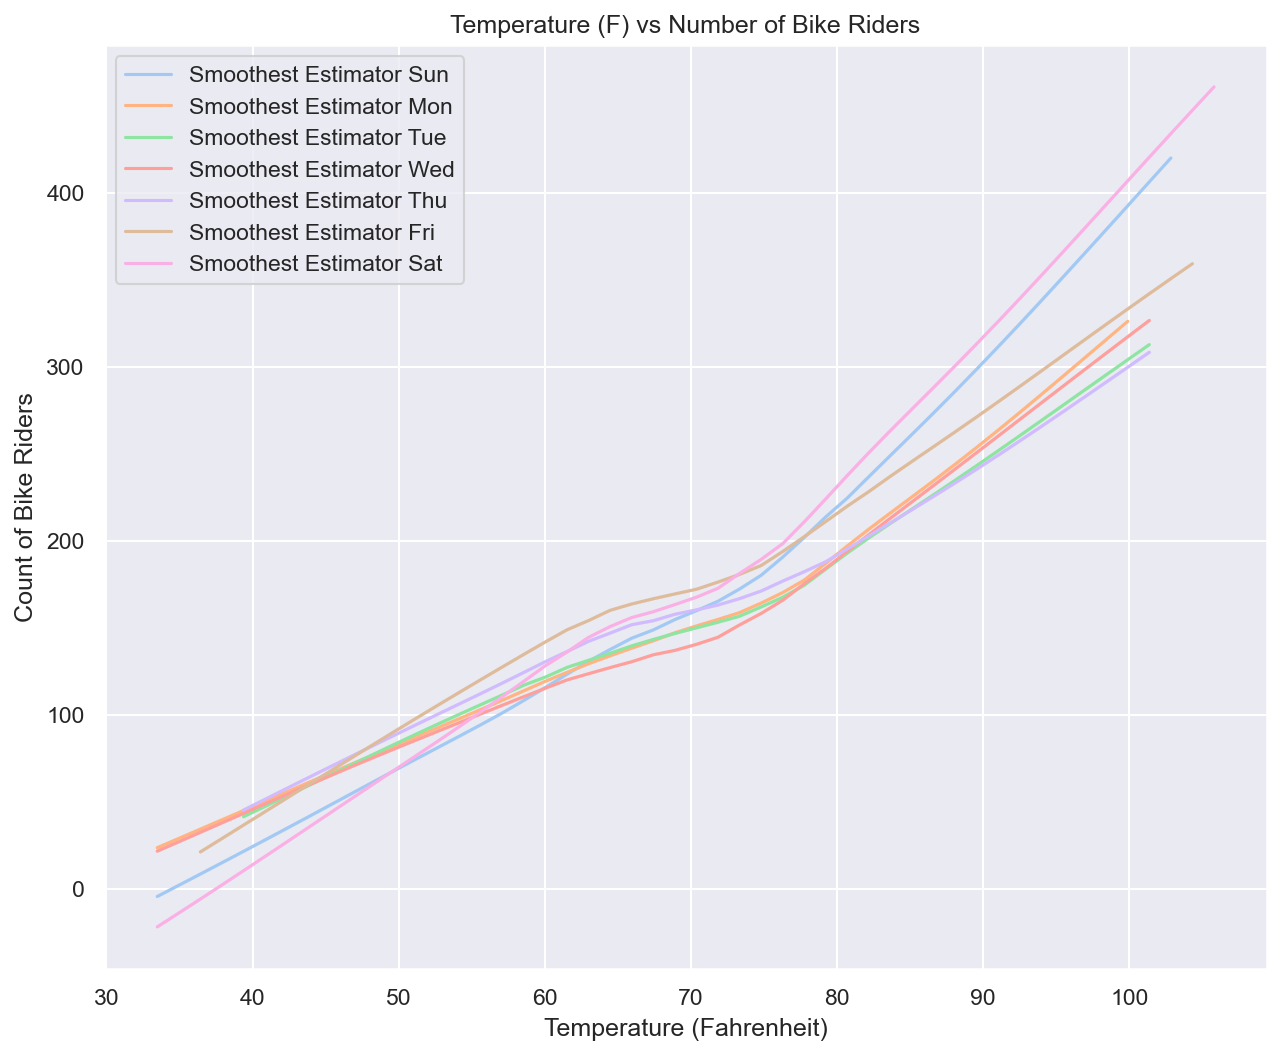

In [72]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(10,8))
color_pal = sns.color_palette("pastel")
bike["temp_f"] = ((bike["temp"] * 41)*(9/5)) + 32
for i in range(len(days)):
    day = days[i]
    x_test = bike[bike["weekday"] == day]["temp_f"]
    y_test = bike[bike["weekday"] == day]["cnt"]
    ysmooth_testing = lowess(y_test,x_test, return_sorted = False)
    sns.lineplot(x = x_test, y = ysmooth_testing, label = f"Smoothest Estimator {day}", color = color_pal[i])
    
plt.legend()
plt.xlabel("Temperature (Fahrenheit)"); plt.ylabel("Count of Bike Riders"); plt.title("Temperature (F) vs Number of Bike Riders")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [74]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results: All test cases passed!

q6a results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following in the File menu

* Save and Checkpoint
* Close and Halt

Then upload your notebook to Canvas Assignment HW4.